# MLP Double lesion Test

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
MODE = 'STORE'

assert MODE in ('STORE', 'LOAD')

In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

import sys
sys.path.append('..')

import pickle

from IPython import display
from tqdm import tqdm
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd

from src.pointers import DATA_PATHS
from src.experiment_tagging import get_model_path
from src.lesion import (perform_lesion_experiment,
                              report_lesion_test)
from src.visualization import (run_double_spectral_cluster, draw_mlp_clustering_report,
                               build_weighted_dist_mat, plot_weighted_dist_mat)

sns.set(style='whitegrid')

In [4]:
MLP_MODELS = [
#              ('mnist', 'MNIST'),
#              ('line', 'LINE'),
#              ('cifar10', 'CIFAR10'),
#              ('fashion', 'FASHION'),
#              ('random', 'RANDOM'),
              ('mnist', 'MNIST+DROPOUT'),
#              ('line', 'LINE+DROPOUT'),
#              ('cifar10', 'CIFAR10+DROPOUT'),
#              ('fashion', 'FASHION+DROPOUT')
             ]

In [138]:
if MODE == 'LOAD':
    with open('../results/double-lesion-mnist-dropout.pickle', 'rb') as f:
        (N_CLUSTERS, single_df,
         TWO_WAY_N_SHUFFLES, TWO_WAY_PVALUE_THRESHOLD,
         double_joint_df, joint_metadata, 
         double_conditional_df, conditional_metadata) = pickle.load(f)
        
if MODE == 'STORE':
    N_CLUSTERS = 10
    TWO_WAY_N_SHUFFLES = 50
    TWO_WAY_PVALUE_THRESHOLD = 1 / (TWO_WAY_N_SHUFFLES + 1)

100%|██████████| 1/1 [00:28<00:00, 28.69s/it]


CPU times: user 1min 10s, sys: 1min 28s, total: 2min 38s
Wall time: 28.7 s


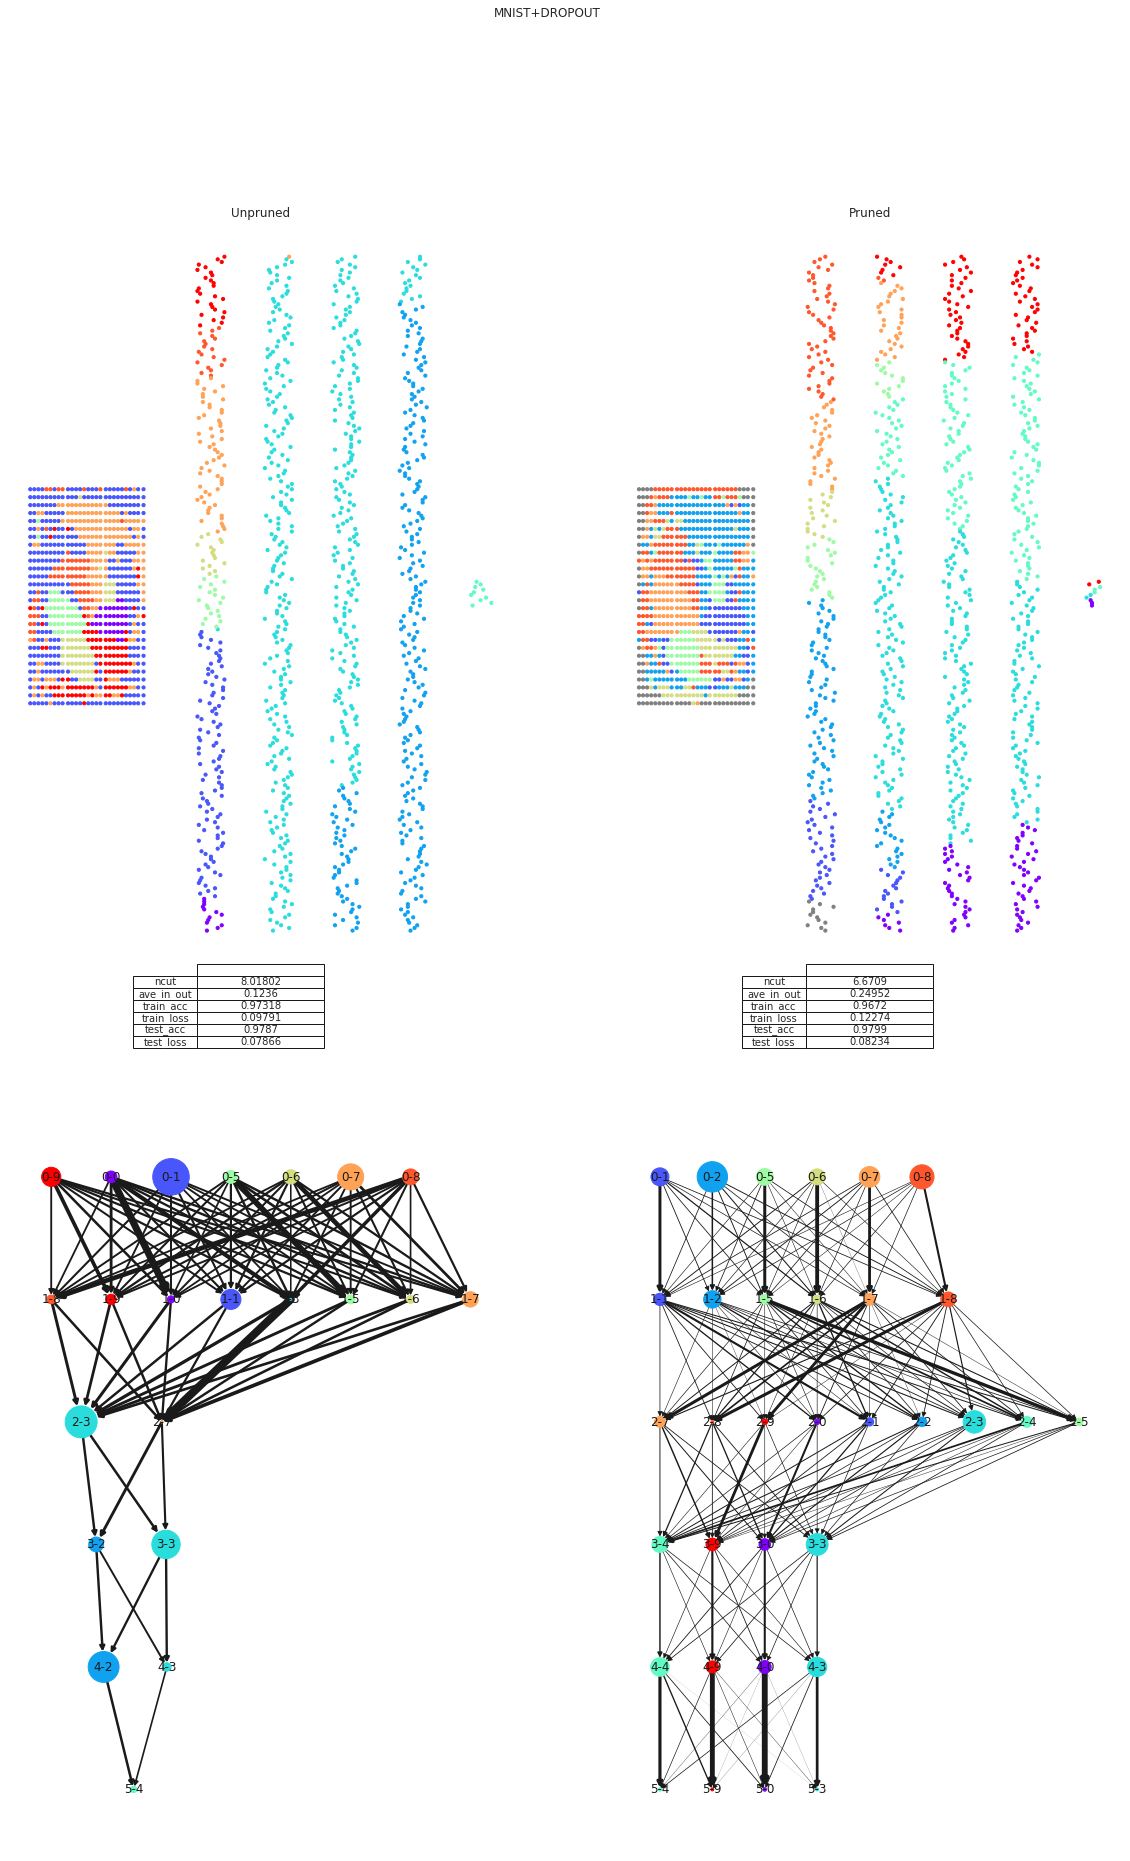

In [6]:
%%time

for _, model_tag in tqdm(MLP_MODELS):
    model_path = get_model_path(model_tag)
    clustering_result = run_double_spectral_cluster(model_path, n_clusters=N_CLUSTERS, with_shuffle=False)

    draw_mlp_clustering_report(model_path,
                               clustering_result,
                               n_cluster=N_CLUSTERS, title=f'{model_tag}')

--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.7/logging/__init__.py", line 1037, in emit
    stream.write(msg + self.terminator)
ValueError: I/O operation on closed file.
Call stack:
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 563, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.7/asyncio/base_events.py", line 539, in run_forever
    self._run_once()
  

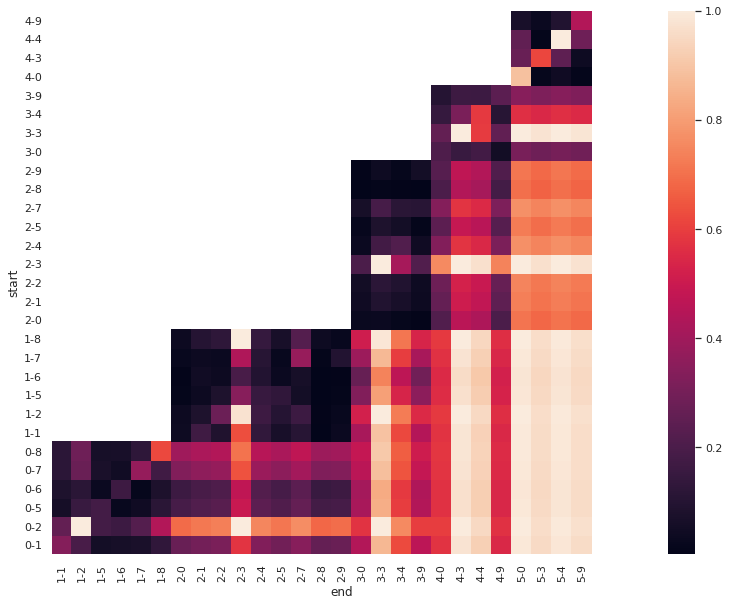

In [7]:
plot_weighted_dist_mat(build_weighted_dist_mat(model_path, clustering_result));

## Single

  0%|          | 0/1 [00:00<?, ?it/s]

Single worker!
Loading data...
Running spectral clustering...
Loading model and extracting weights...
Evaluate original model...
Extract metadata...
Apply lesion trial on the true clustering...



  0%|          | 0/100 [00:00<?, ?it/s]

Apply lesion trial on the random clusterings...



100%|██████████| 1/1 [22:31<00:00, 1351.36s/it]


CPU times: user 40min 27s, sys: 4min 42s, total: 45min 10s
Wall time: 22min 31s


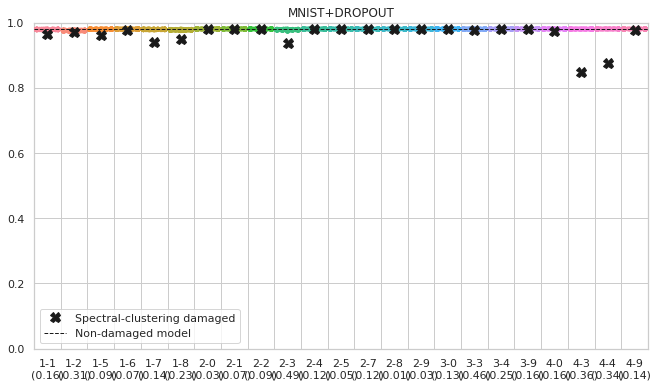

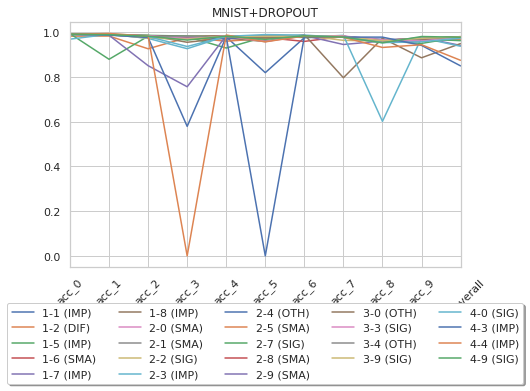

In [8]:
%%time

for dataset_name, model_tag in tqdm(MLP_MODELS):
    model_path = get_model_path(model_tag)
    if MODE == 'STORE':
        single_df = report_lesion_test(model_tag,
                                         '.' + DATA_PATHS[dataset_name],
                                         model_path,
                                         n_clusters=N_CLUSTERS, n_shuffles=100, n_way=1,
                                         verbose=True)

In [9]:
single_df

diff  corrected_pvalue  label_in_layer_proportion    true  \
layer label                                                                
1     1     -0.0153          0.009901                   0.155738  0.9649   
      2     -0.0106          0.019802                   0.311475  0.9696   
      5     -0.0176          0.009901                   0.094262  0.9626   
      6     -0.0028          0.009901                   0.073770  0.9774   
      7     -0.0387          0.009901                   0.139344  0.9415   
      8     -0.0305          0.009901                   0.225410  0.9497   
2     0      0.0003          0.841584                   0.027344  0.9805   
      1     -0.0008          0.009901                   0.066406  0.9794   
      2     -0.0014          0.009901                   0.085938  0.9788   
      3     -0.0427          0.009901                   0.492188  0.9375   
      4     -0.0002          0.376238                   0.117188  0.9800   
      5      0.0005          0.920792                   0.054688  0.9807   
      7     -0.0013          0.009901                   0.117188  0.9789   
      8      0.0001          0.623762                   0.007812  0.9803   
      9     -0.0004          0.029703                   0.031250  0.9798   
3     0     -0.0004          0.039604                   0.128906  0.9798   
      3     -0.0024          0.009901                   0.464844  0.9778   
      4      0.0000          0.336634                   0.250000  0.9802   
      9     -0.0011          0.009901                   0.156250  0.9791   
4     0     -0.0059          0.009901                   0.160156  0.9743   
      3     -0.1304          0.009901                   0.359375  0.8498   
      4     -0.1055          0.009901                   0.335938  0.8747   
      9     -0.0022          0.009901                   0.144531  0.9780   

                 taxonomy      mean       std     z_score  n_layer_label  
layer label                                                               
1     1         important  0.978807  0.000669  -20.783859             38  
      2      diff-but-sig  0.975264  0.001383   -4.095508             76  
      5         important  0.979574  0.000532  -31.898602             23  
      6             small  0.979766  0.000525   -4.503571             18  
      7         important  0.978939  0.000671  -55.755788             34  
      8         important  0.977640  0.000859  -32.510669             55  
2     0             small  0.980229  0.000237    1.144988              7  
      1             small  0.980197  0.000332   -2.400941             17  
      2      sig-but-diff  0.980146  0.000346   -3.887466             22  
      3         important  0.977898  0.001143  -35.349142            126  
      4             other  0.980068  0.000370   -0.183889             30  
      5             small  0.980202  0.000311    1.599265             14  
      7      sig-but-diff  0.980095  0.000378   -3.158922             30  
      8             small  0.980211  0.000169    0.525665              2  
      9             small  0.980214  0.000258   -1.605801              8  
3     0             other  0.980333  0.000322   -1.657187             33  
      3      sig-but-diff  0.979787  0.000508   -3.909523            119  
      4             other  0.980284  0.000361   -0.232573             64  
      9      sig-but-diff  0.980366  0.000293   -4.319460             40  
4     0      sig-but-diff  0.980289  0.000276  -21.704347             41  
      3         important  0.980083  0.000383 -340.412010             92  
      4         important  0.980209  0.000353 -299.309849             86  
      9      sig-but-diff  0.980276  0.000222  -10.248804             37

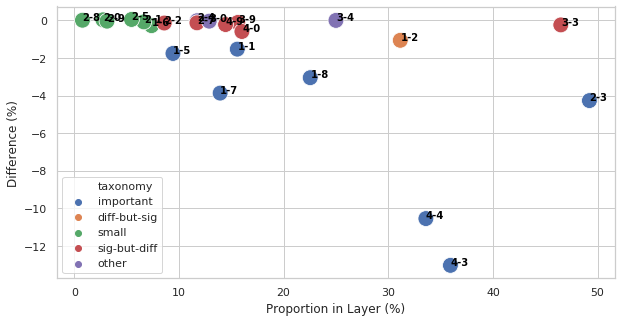

In [164]:
from src.lesion.output import plot_cluster_scatter

plot_cluster_scatter(single_df);

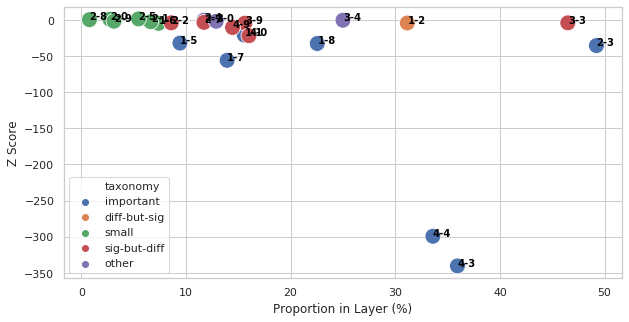

In [166]:
plot_cluster_scatter(single_df, y='z_score');

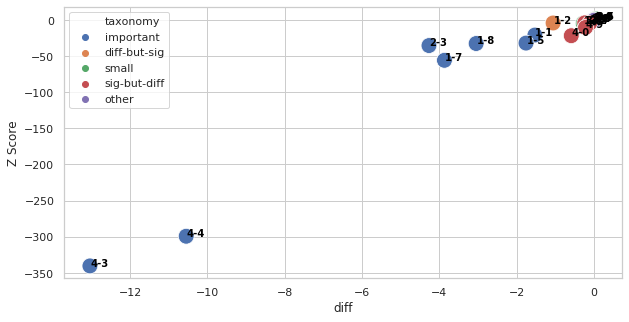

In [173]:
plot_cluster_scatter(single_df, x='diff', y='z_score');

#### Let's look on a random clustering

In [63]:
ax = plot_cluster_scatter(report_lesion_test(model_tag,
                                         '.' + DATA_PATHS[dataset_name],
                                         model_path,
                                         n_clusters=N_CLUSTERS, n_shuffles=100, n_way=1,
                                         with_overall_plot=False, with_accuracy_profile=False,
                                         true_as_random=True,
                                         verbose=False),
                    vmin=-13)

ax.set_ylim(-13, 1);

KeyboardInterrupt: 

## Double

### Joint

In [139]:
from src.lesion.output import (build_double_mat,
                                     build_double_joint_interaction_mat,
                                     build_conditional_double_df,
                                     plot_double_heatmap,
                                     compute_damaged_cluster_stats)

In [140]:
if MODE == 'STORE':

    (joint_true_results,
     joint_all_random_results,
     joint_metadata,
     joint_evaluation) = perform_lesion_experiment('.' + DATA_PATHS[dataset_name],
                                                   model_path,
                                                   n_clusters=N_CLUSTERS,
                                                   n_shuffles=TWO_WAY_N_SHUFFLES,
                                                   n_way=2,
                                                   n_way_type='joint',
                                                   with_random=True,
                                                   verbose=True)



Single worker!
Loading data...
Running spectral clustering...
Loading model and extracting weights...
Evaluate original model...
Extract metadata...
Apply lesion trial on the true clustering...


  0%|          | 0/50 [00:00<?, ?it/s]

Apply lesion trial on the random clusterings...


100%|██████████| 50/50 [3:05:01<00:00, 222.03s/it]  


In [141]:
from src.lesion.output import compute_damaged_cluster_stats

In [142]:
if MODE == 'STORE':
    double_joint_df = compute_damaged_cluster_stats(joint_true_results, joint_all_random_results,
                                                     joint_metadata, joint_evaluation)

double_joint_df.head()

value,diff,corrected_pvalue,true,taxonomy,mean,std,z_score
labels_in_layers,,,,,,,
"((1, 1), (1, 1))",-0.0153,0.019608,0.9649,important,0.978794,0.000580,-23.951831
"((1, 1), (1, 2))",-0.0558,0.019608,0.9244,important,0.966584,0.002843,-14.840144
"((1, 1), (1, 5))",-0.0432,0.019608,0.9370,important,0.977048,0.000827,-48.416766
"((1, 1), (1, 6))",-0.0360,0.019608,0.9442,important,0.977542,0.000726,-45.947796
"((1, 1), (1, 7))",-0.0665,0.019608,0.9137,important,0.975858,0.001109,-56.059098


#### $Acc_{ij}$

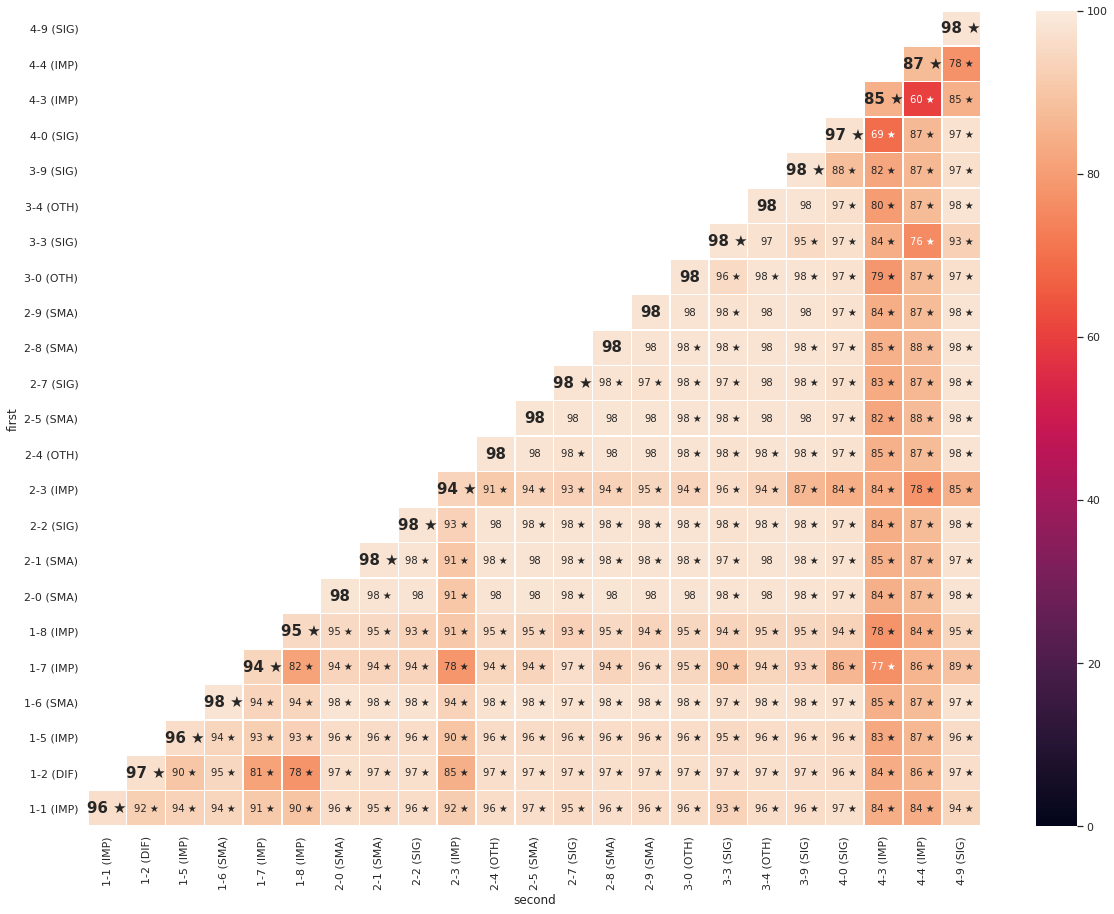

In [143]:
double_joint_true_mat = build_double_mat(double_joint_df, single_df, col='true')

plot_double_heatmap(double_joint_true_mat, double_joint_df,
                     metadata=joint_metadata, pvalue_threshod=TWO_WAY_PVALUE_THRESHOLD);

#### $Diff_{ij}$

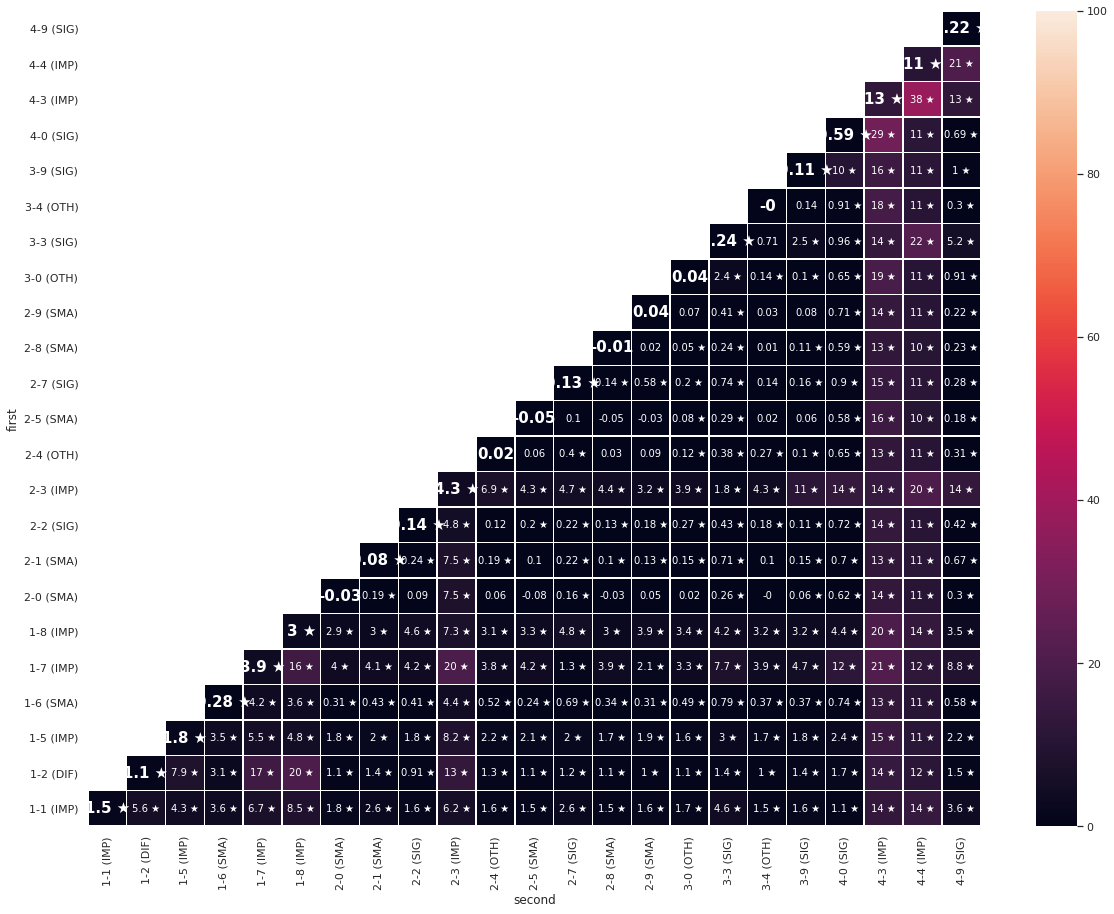

In [144]:
double_joint_diff_mat = -build_double_mat(double_joint_df, single_df, col='diff')

plot_double_heatmap(double_joint_diff_mat, double_joint_df,
                     metadata=joint_metadata, pvalue_threshod=TWO_WAY_PVALUE_THRESHOLD);

#### $Diff_{ij} - (Diff_{i} + Diff_{j})$

Note: the diagonal has a different meaning: it is the single is accuracy, not a difference.

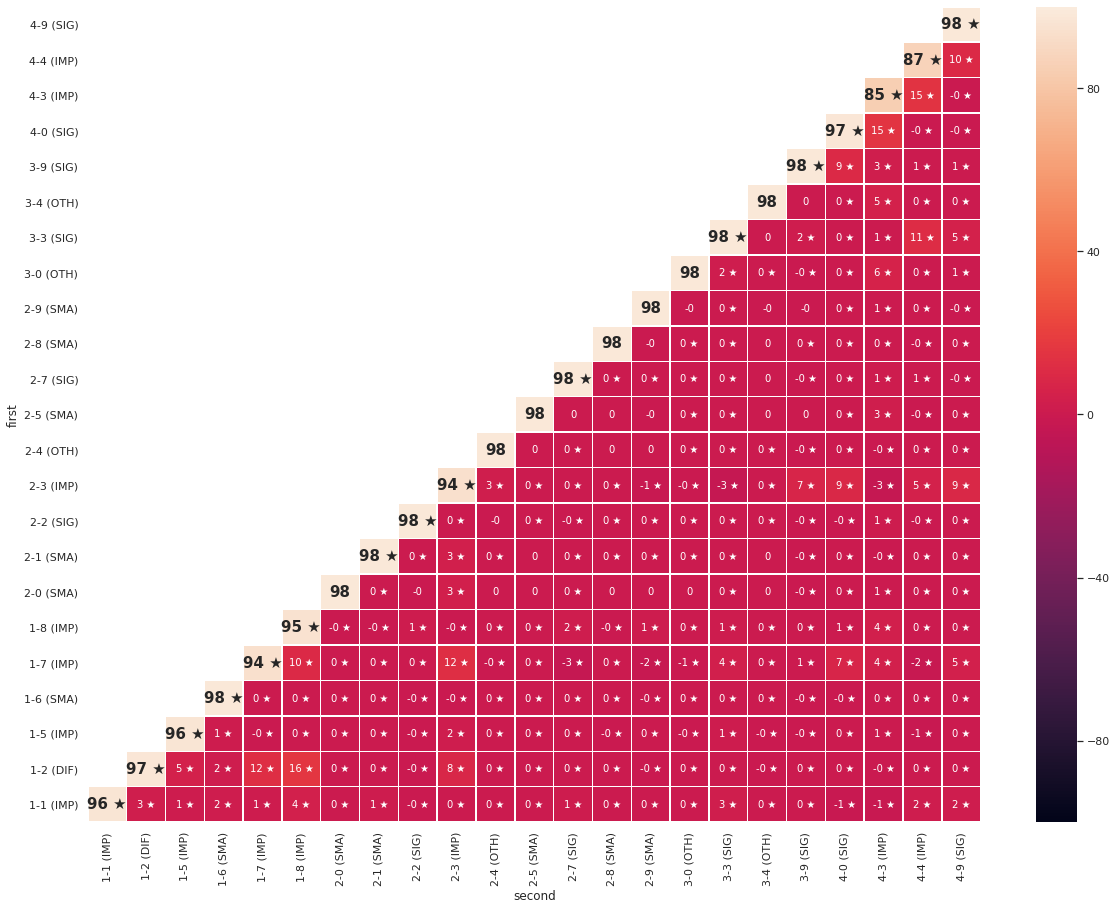

In [145]:
double_joint_interaction_diff_mat = build_double_joint_interaction_mat(double_joint_diff_mat,
                                                                         single_df)


plot_double_heatmap(double_joint_interaction_diff_mat, double_joint_df,
                     metadata=joint_metadata, pvalue_threshod=TWO_WAY_PVALUE_THRESHOLD,
                     vmin=-100, vmax=100, fmt='.0f');

#### What can we learn from the joint TWBD?

Using the single TWBD prior, with created a taxonomy of clusters, we get the primary division is to important (diff > 1 and significant) and not-important. Let's use this dichotomy to analyze the joint TWBD.

Let's look at layer-cluster X and Y. If we assume that they are both important (as single), we won't be surprised that the joint damaged XY is also important(diff > 1 and significant). Therefore, we should focus on XY if it is not important.

If we assume that X and Y are both *not* important, it would be interesting if the joint damage XY is important. It means that only their combined formation together is impactful.

Finally, considering the case for X is important, and Y is not (without loss of generality), our prior would be that the joint damaged XY will also be important, because of the contribution of X. So not important XY matters in that situation.

To summary up, these are the cases we care about, because they convey information that changes our single TWBD prior:

| X | Y | XY |
|---|---|----|
| ✔️ | ✔️ | ❌  |
| ✔️ | ❌ | ❌  |
| ❌ | ❌ | ✔️  |

In [146]:
double_joint_imp_df = double_joint_df.reset_index()


double_joint_imp_df[['first', 'second']] = (double_joint_imp_df['labels_in_layers']
                                           .apply((lambda x: pd.Series([x[0], x[1]]))))

double_joint_imp_df['first_taxonomy'] = double_joint_imp_df['first'].apply(lambda index: single_df.loc[index, 'taxonomy'])
double_joint_imp_df['second_taxonomy'] = double_joint_imp_df['second'].apply(lambda index: single_df.loc[index, 'taxonomy'])

double_joint_imp_df['is_important'] = (double_joint_imp_df['taxonomy'] == 'important')
double_joint_imp_df['first_is_important'] = (double_joint_imp_df['first_taxonomy'] == 'important')
double_joint_imp_df['second_is_important'] = (double_joint_imp_df['second_taxonomy'] == 'important')


is_important_fields = ['first_is_important', 'second_is_important', 'is_important']

double_joint_imp_df[is_important_fields] = double_joint_imp_df[is_important_fields].replace({True: '✔️', False: '❌'})

double_joint_imp_grouped_df = (df
 .groupby(is_important_fields)
 .size()
 .sort_values(ascending=False))

double_joint_imp_grouped_df

first_is_important  second_is_important  is_important
❌                   ❌                    ❌               116
✔️                  ❌                    ✔️               72
❌                   ✔️                   ✔️               40
✔️                  ✔️                   ✔️               28
❌                   ❌                    ✔️               20
dtype: int64

In [147]:
# The "interesting" cases with at least one important cluster doesn't exist
assert not double_joint_imp_grouped_df.index.isin([('✔️', '✔️', '❌'),
                                               ('✔️', '❌', '❌'),
                                               ('❌', '✔️', '❌')]).any()

# Howerver, we do have the emerging of a new important two joint clusters
assert double_joint_imp_grouped_df.index.isin([('❌', '❌', '✔️')]).any()

Let's dig into ❌❌✔️. What are the layer-cluster pairs? We'll sort them by the Z score:

In [174]:
intresting_double_joint_imp_df = (double_joint_imp_df[(double_joint_imp_df[is_important_fields] == ['❌', '❌', '✔️'])
                                              .all(axis=1)])

intresting_double_joint_imp_df.sort_values('diff')

value,labels_in_layers,diff,corrected_pvalue,true,taxonomy,mean,std,z_score,first,second,first_taxonomy,second_taxonomy,is_important,first_is_important,second_is_important
262,"((3, 9), (4, 0))",-0.1010,0.019608,0.8792,important,0.980256,0.000373,-270.810871,"(3, 9)","(4, 0)",sig-but-diff,sig-but-diff,✔️,❌,❌
254,"((3, 3), (4, 9))",-0.0521,0.019608,0.9281,important,0.979728,0.000597,-86.536662,"(3, 3)","(4, 9)",sig-but-diff,sig-but-diff,✔️,❌,❌
25,"((1, 2), (1, 6))",-0.0310,0.019608,0.9492,important,0.972142,0.002117,-10.834591,"(1, 2)","(1, 6)",diff-but-sig,small,✔️,❌,❌
250,"((3, 3), (3, 9))",-0.0255,0.019608,0.9547,important,0.978672,0.000851,-28.179160,"(3, 3)","(3, 9)",sig-but-diff,sig-but-diff,✔️,❌,❌
241,"((3, 0), (3, 3))",-0.0241,0.019608,0.9561,important,0.979064,0.000691,-33.233968,"(3, 0)","(3, 3)",other,sig-but-diff,✔️,❌,❌
41,"((1, 2), (4, 0))",-0.0172,0.019608,0.9630,important,0.975138,0.001097,-11.063713,"(1, 2)","(4, 0)",diff-but-sig,sig-but-diff,✔️,❌,❌
44,"((1, 2), (4, 9))",-0.0146,0.019608,0.9656,important,0.975162,0.001145,-8.351249,"(1, 2)","(4, 9)",diff-but-sig,sig-but-diff,✔️,❌,❌
38,"((1, 2), (3, 3))",-0.0143,0.019608,0.9659,important,0.973338,0.001780,-4.178299,"(1, 2)","(3, 3)",diff-but-sig,sig-but-diff,✔️,❌,❌
29,"((1, 2), (2, 1))",-0.0138,0.019608,0.9664,important,0.975264,0.001109,-7.992055,"(1, 2)","(2, 1)",diff-but-sig,small,✔️,❌,❌
40,"((1, 2), (3, 9))",-0.0138,0.019608,0.9664,important,0.974790,0.001142,-7.346705,"(1, 2)","(3, 9)",diff-but-sig,sig-but-diff,✔️,❌,❌


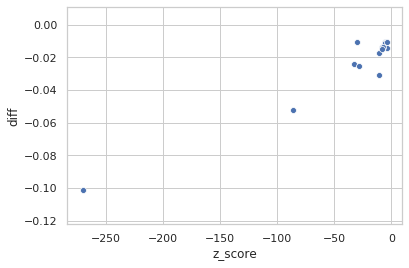

In [162]:
sns.scatterplot(intresting_double_joint_imp_df['z_score'],
                intresting_double_joint_imp_df['diff'])

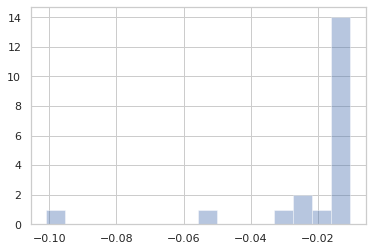

In [153]:
sns.distplot(intresting_double_joint_imp_df[['diff']], kde=False)

We can also remiend ourselves the taxonomy of each cluster:

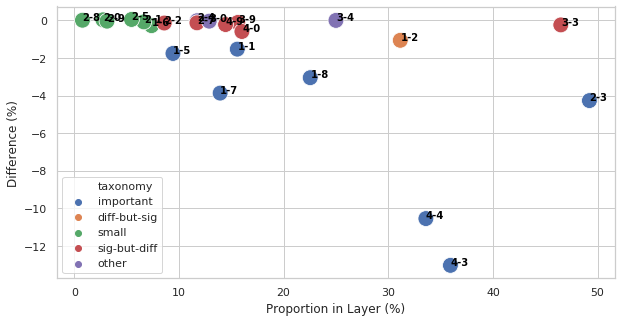

In [149]:
plot_cluster_scatter(single_df);

In [ ]:
twc_diff_mat = np.diag(double_conditional_true_mat) - double_conditional_true_mat
twc_sig_mat = (double_cond_pvalue_mat == 'Significant')
twc_imp_mat = (twc_diff_mat > 1) & twc_sig_mat

twc_imp_diff_mat = twc_diff_mat.copy()
twc_imp_diff_mat[~twc_imp_mat] = None

In [ ]:
from src.lesion.output import (build_double_pvalue_mat,
                                     plot_double_pvalue_mat)

#def plot_

twc_diff_mat = np.diag(double_conditional_true_mat) - double_conditional_true_mat
twc_sig_mat = (double_cond_pvalue_mat == 'Significant')
twc_imp_mat = (twc_diff_mat > 1) & twc_sig_mat

twc_imp_diff_mat = twc_diff_mat.copy()
twc_imp_diff_mat[~twc_imp_mat] = None
np.fill_diagonal(twc_imp_diff_mat.values, np.diag(double_joint_true_mat))

plot_double_heatmap(twc_imp_diff_mat,single_df, with_diag=False, with_text_format=False,
                     metadata=conditional_metadata);

#twc_imp_mat = twc_imp_mat.astype(str)
#np.fill_diagonal(twc_imp_mat.values, 'Single')

#plot_double_pvalue_mat(twc_imp_mat, value_to_color='bool');

### Conditional
### $s(first|second) = s(i|j) = Diff_{ij} - Diff_{j} = (Acc - Acc_{ij}) - (Acc - Acc_{j}) = Acc_{j} - Acc_{ij}$

Note: the diagonal has a different meaning: it is the single is accuracy, not a difference.

In [18]:
if MODE == 'STORE':
    (conditional_true_results,
     conditional_all_random_results,
     conditional_metadata,
     conditional_evaluation) = perform_lesion_experiment('.' + DATA_PATHS[dataset_name],
                                                   model_path,
                                                   n_clusters=N_CLUSTERS,
                                                   n_shuffles=TWO_WAY_N_SHUFFLES,
                                                   n_way=2,
                                                   n_way_type='conditional',
                                                   with_random=True,
                                                   verbose=True)

Single worker!
Loading data...
Running spectral clustering...
Loading model and extracting weights...
Evaluate original model...
Extract metadata...
Apply lesion trial on the true clustering...


  0%|          | 0/25 [00:00<?, ?it/s]

Apply lesion trial on the random clusterings...


100%|██████████| 25/25 [1:51:42<00:00, 268.10s/it]


In [37]:
if MODE == 'STORE':
    double_conditional_df = compute_damaged_cluster_stats(conditional_true_results,
                                                           conditional_all_random_results,
                                                           conditional_metadata,
                                                           conditional_evaluation,
                                                           double_joint_df=double_joint_df)

double_conditional_df.head()

../src/lesion/output.py:155: UserWarning: Make sure that `n_shuffled` for conditional double results should be the same as the one for generating the joint double df!
  if double_joint_df is not None:


value,diff,corrected_pvalue,true,mean,std,z_score
labels_in_layers,,,,,,
"((1, 1), (1, 1))",-0.0153,0.038462,0.9649,0.978808,0.000577,-24.121949
"((1, 1), (1, 2))",-0.0558,0.038462,0.9244,0.962376,0.002671,-14.216907
"((1, 1), (1, 5))",-0.0432,0.038462,0.9370,0.956644,0.005298,-3.707621
"((1, 1), (1, 6))",-0.0360,0.038462,0.9442,0.974256,0.001545,-19.458308
"((1, 1), (1, 7))",-0.0665,0.115385,0.9137,0.926180,0.008589,-1.453047


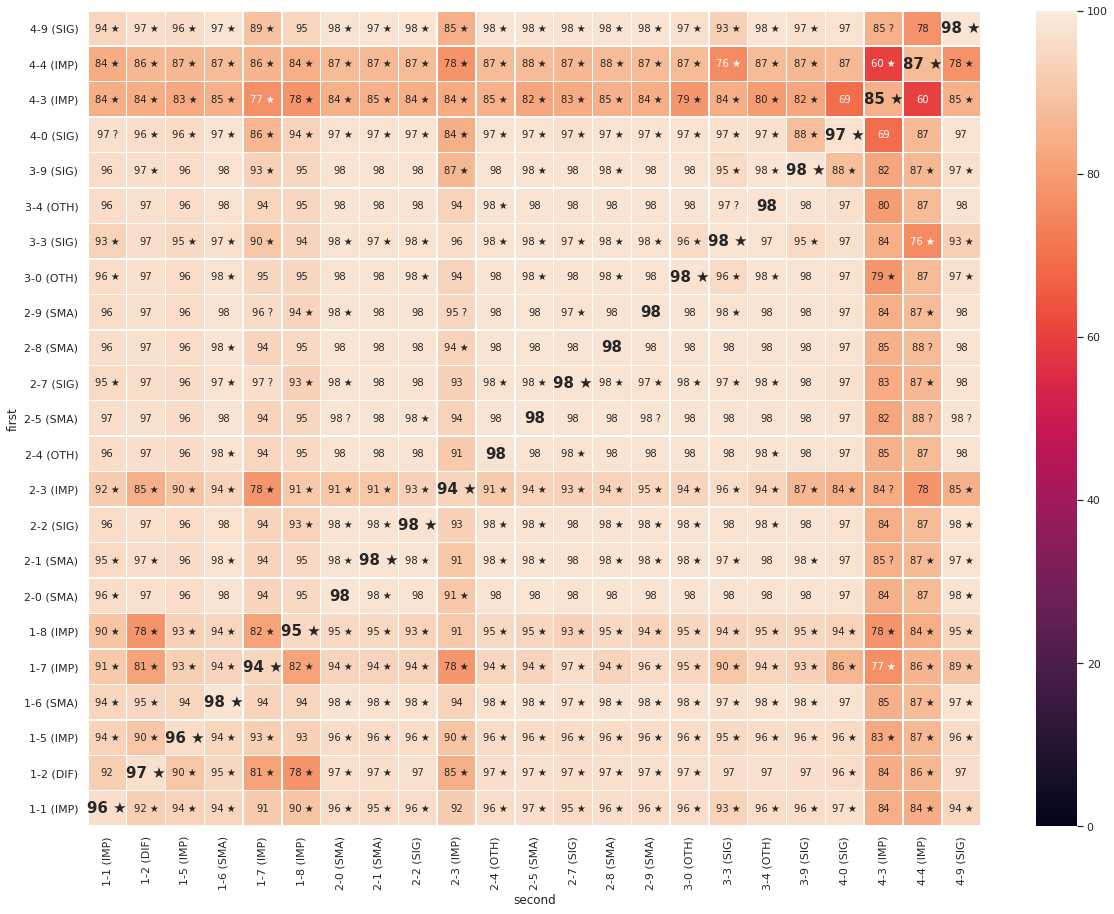

In [38]:
double_conditional_true_mat = build_double_mat(double_conditional_df, single_df, col='true')

plot_double_heatmap(double_conditional_true_mat, double_conditional_df, is_trig=False,
                     metadata=conditional_metadata, pvalue_threshod=TWO_WAY_PVALUE_THRESHOLD);

### Do not trust the stars in this filtered heatmap:

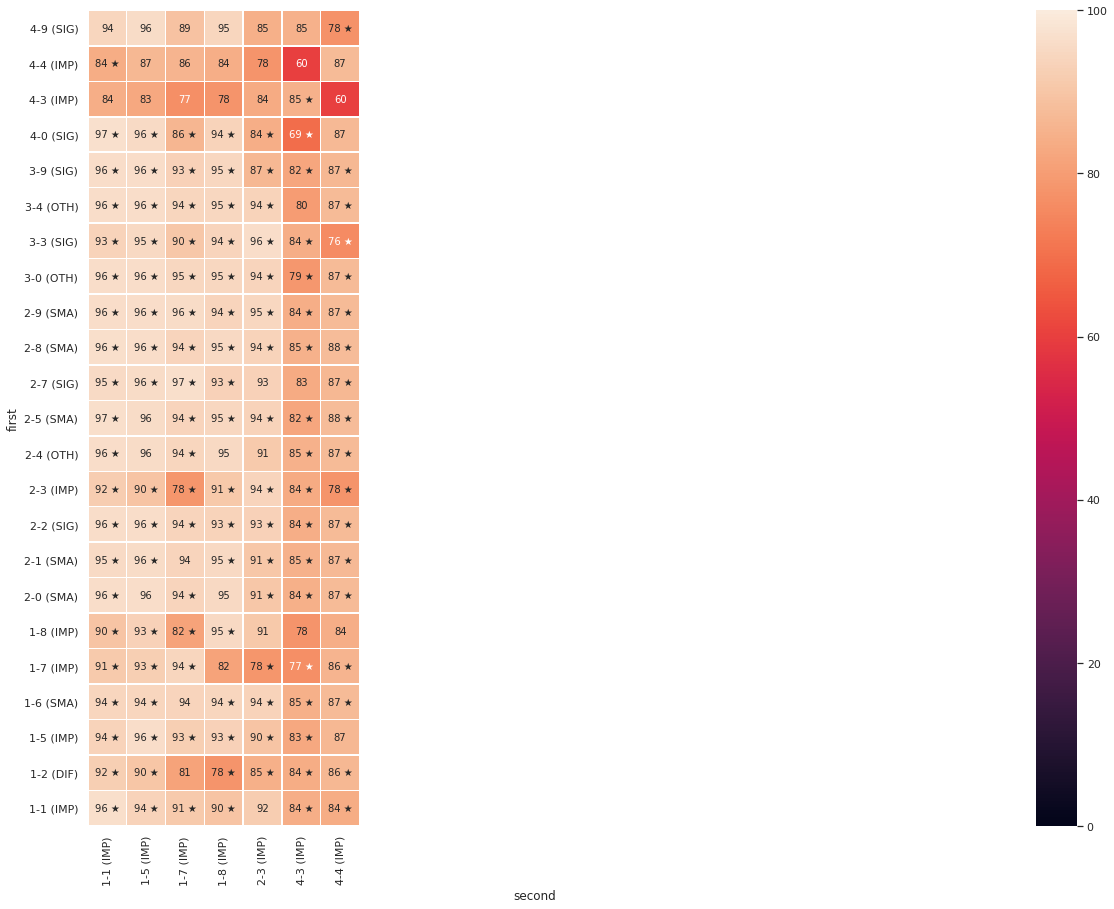

In [39]:
double_conditional_true_second_IMP_mat = (double_conditional_true_mat
                                           # .filter(like='IMP', axis='index')
                                           .filter(like='IMP', axis='columns'))

plot_double_heatmap(double_conditional_true_second_IMP_mat, double_conditional_df, with_diag=False,
                     metadata=conditional_metadata, pvalue_threshod=TWO_WAY_PVALUE_THRESHOLD);

#### Pvalue Analysis

In [40]:
from src.lesion.output import (build_double_pvalue_mat,
                                     plot_double_pvalue_mat)


double_cond_pvalue_mat = build_double_pvalue_mat(double_conditional_df,
                                                   single_df,
                                                   pvalue_threshod=TWO_WAY_PVALUE_THRESHOLD)

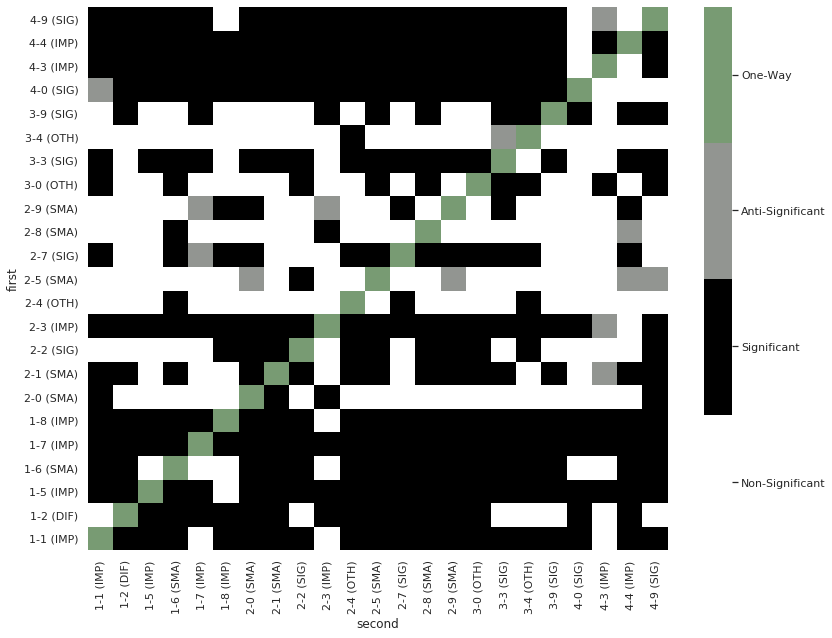

In [41]:
plot_double_pvalue_mat(double_cond_pvalue_mat);

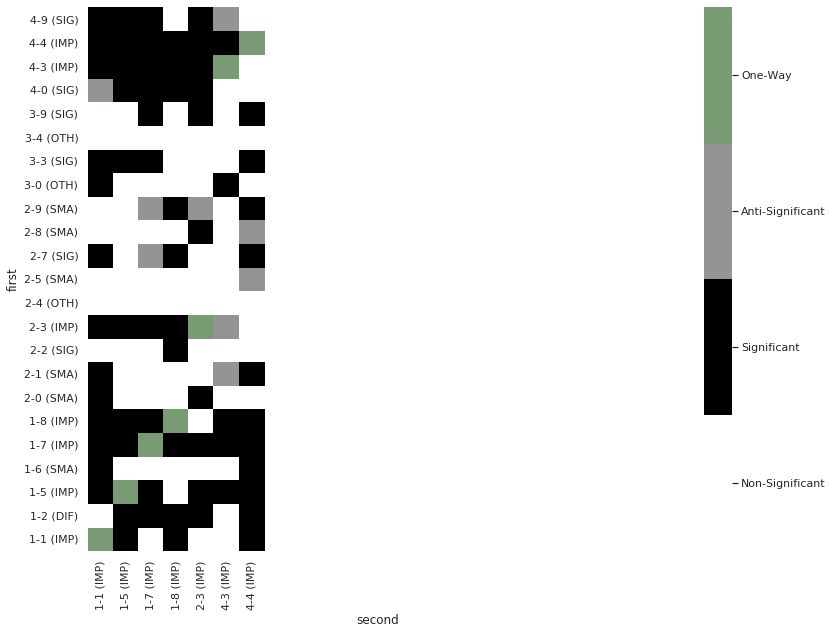

In [42]:
double_conditional_pvalue_second_IMP_mat = (double_cond_pvalue_mat
                                           # .filter(like='IMP', axis='index')
                                           .filter(like='IMP', axis='columns'))

plot_double_pvalue_mat(double_conditional_pvalue_second_IMP_mat);

In [43]:
single_df

diff  corrected_pvalue  label_in_layer_proportion    true  \
layer label                                                                
1     1     -0.0153          0.009901                   0.155738  0.9649   
      2     -0.0106          0.019802                   0.311475  0.9696   
      5     -0.0176          0.009901                   0.094262  0.9626   
      6     -0.0028          0.009901                   0.073770  0.9774   
      7     -0.0387          0.009901                   0.139344  0.9415   
      8     -0.0305          0.009901                   0.225410  0.9497   
2     0      0.0003          0.841584                   0.027344  0.9805   
      1     -0.0008          0.009901                   0.066406  0.9794   
      2     -0.0014          0.009901                   0.085938  0.9788   
      3     -0.0427          0.009901                   0.492188  0.9375   
      4     -0.0002          0.376238                   0.117188  0.9800   
      5      0.0005          0.920792                   0.054688  0.9807   
      7     -0.0013          0.009901                   0.117188  0.9789   
      8      0.0001          0.623762                   0.007812  0.9803   
      9     -0.0004          0.029703                   0.031250  0.9798   
3     0     -0.0004          0.039604                   0.128906  0.9798   
      3     -0.0024          0.009901                   0.464844  0.9778   
      4      0.0000          0.336634                   0.250000  0.9802   
      9     -0.0011          0.009901                   0.156250  0.9791   
4     0     -0.0059          0.009901                   0.160156  0.9743   
      3     -0.1304          0.009901                   0.359375  0.8498   
      4     -0.1055          0.009901                   0.335938  0.8747   
      9     -0.0022          0.009901                   0.144531  0.9780   

                 taxonomy      mean       std     z_score  n_layer_label  
layer label                                                               
1     1         important  0.978807  0.000669  -20.783859             38  
      2      diff-but-sig  0.975264  0.001383   -4.095508             76  
      5         important  0.979574  0.000532  -31.898602             23  
      6             small  0.979766  0.000525   -4.503571             18  
      7         important  0.978939  0.000671  -55.755788             34  
      8         important  0.977640  0.000859  -32.510669             55  
2     0             small  0.980229  0.000237    1.144988              7  
      1             small  0.980197  0.000332   -2.400941             17  
      2      sig-but-diff  0.980146  0.000346   -3.887466             22  
      3         important  0.977898  0.001143  -35.349142            126  
      4             other  0.980068  0.000370   -0.183889             30  
      5             small  0.980202  0.000311    1.599265             14  
      7      sig-but-diff  0.980095  0.000378   -3.158922             30  
      8             small  0.980211  0.000169    0.525665              2  
      9             small  0.980214  0.000258   -1.605801              8  
3     0             other  0.980333  0.000322   -1.657187             33  
      3      sig-but-diff  0.979787  0.000508   -3.909523            119  
      4             other  0.980284  0.000361   -0.232573             64  
      9      sig-but-diff  0.980366  0.000293   -4.319460             40  
4     0      sig-but-diff  0.980289  0.000276  -21.704347             41  
      3         important  0.980083  0.000383 -340.412010             92  
      4         important  0.980209  0.000353 -299.309849             86  
      9      sig-but-diff  0.980276  0.000222  -10.248804             37

### Store Data

In [175]:
if MODE == 'STORE':
    with open('../results/double-lesion-mnist-dropout.pickle', 'wb') as f:
        pickle.dump((N_CLUSTERS, single_df,
                     TWO_WAY_N_SHUFFLES, TWO_WAY_PVALUE_THRESHOLD,
                     double_joint_df, joint_metadata,
                     double_conditional_df, conditional_metadata),
                   f)

### Visualize as Graph

In [ ]:
import numpy as np
import pandas as pd
import holoviews as hv
import networkx as nx
from holoviews import opts

hv.extension('bokeh')

defaults = dict(width=400, height=400, padding=0.1)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))

stacked_mat = (double_cond_pvalue_mat == 'Significant').stack()
edges = [(first, second) for first, second in stacked_mat[stacked_mat].index]

DG = nx.DiGraph()
DG.add_nodes_from(double_cond_pvalue_mat.index)
DG.add_edges_from(edges)

# pos = nx.drawing.nx_agraph.graphviz_layout(DG, prog='dot')
# pos = nx.drawing.bipartite_layout(DG)

#nx.draw_shell(DG,
#        with_labels = True)


graph = hv.Graph.from_networkx(DG, nx.layout.circular_layout).opts(directed=True,
                                                           node_size=5,
                                                        #   arrowhead_length=0.05,
                                                           tools=['hover'])
"""
graph = hv.Graph.from_networkx(DG, nx.layout.fruchterman_reingold_layout)
"""
labels = hv.Labels(graph.nodes, ['x', 'y'], 'index')

(graph * labels.opts(text_font_size='8pt', text_color='white', bgcolor='gray'))
